This is the homework notebook
Questions are available at 'https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2024/01-intro/homework.md'

To understand the fields visit 'https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf'

----------------------------------------------------------------------------------------

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer # for one hot encoding
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# !pip install pyarrow

Now we load New York City Yellow Taxi Trip Records from January and February 2023
'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet'
'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet'

In [3]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_test = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

df.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0


In [4]:
df.shape, df_test.shape

((3066766, 19), (2913955, 19))

In [5]:
df['duration']= df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']
df['duration'] = df['duration'].apply(lambda td:td.total_seconds()/60)

df_test['duration']= df_test['tpep_dropoff_datetime']- df_test['tpep_pickup_datetime']
df_test['duration'] = df_test['duration'].apply(lambda td:td.total_seconds()/60)

----------------------------------------------------------------------------------------

Q3. Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [6]:
df['duration_1to60'] = df['duration'][(df['duration']>=1) & (df['duration']<=60)]

df_test['duration_1to60'] = df_test['duration'][(df_test['duration']>=1) & (df_test['duration']<=60)]

In [7]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']  # im adding the numerical on my own
target = 'duration_1to60'

dv = DictVectorizer()  # for one hot encoding

df[categorical] = df[categorical].astype(str)
train_dict = df[categorical+numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
y_train = df[target].values


df_test[categorical] = df_test[categorical].astype(str)
test_dict = df_test[categorical+numerical].to_dict(orient='records')
X_test = dv.transform(test_dict) # dont do fit_transform again
# X_test = X_test[X_train.columns]
y_test = df_test[target].values


A4. dimensionality of the X_train matrix is 519

-----------------------------------------------------------------------------------------

Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [8]:
print(pd.isna(y_train).sum())

mask = ~np.isnan(y_train)
X_train = X_train[mask]
y_train = y_train[mask]

print(pd.isna(y_train).sum())

print(pd.isna(y_test).sum())

mask = ~np.isnan(y_test)
X_test = X_test[mask]
y_test = y_test[mask]

print(pd.isna(y_test).sum())

57593
0
58004
0


In [9]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

/tmp/ipykernel_4058/2788846470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label= 'pred')
/tmp/ipykernel_4058/2788846470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'actual')


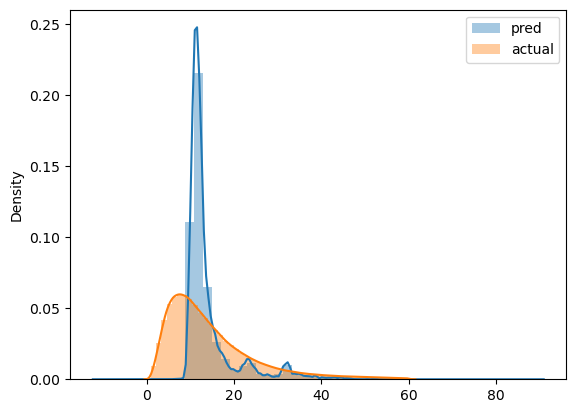

In [10]:
sns.distplot(y_pred, label= 'pred')
sns.distplot(y_test, label = 'actual')
plt.legend()

Q6. Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

7.820103223885409
